#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Ciencia y Analitica de Datos**
###**Tecnológico de Monterrey**
###**Profesor Titular:** Maria de la Paz Rico Fernandez
###**Profesor Tutor:** Juan Miguel Meza Méndez
---
##**Equipo 170**
###Freddy Armendariz Herrera - A01793672
###Samuel Elias Flores Gonzalez - A01793668
---
##**Reto - Entrega 2 - Clasificacion, Ensambles y Presentacion Ejecutiva**
Fecha: 18 de Noviembre del 2022

---

In [ ]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.

# Descargar Data Set
# ==============================
import requests, zipfile
from io import BytesIO

# Tratamiento de datos
# ==============================
import numpy as np
import pandas as pd

# Graficos
# ==============================
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ==============================
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

---
##**Eleccion de una base de datos**

In [ ]:
# Extraccion de la carpeta comprimida
url = "http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip"
req = requests.get(url)
zipfile.ZipFile(BytesIO(req.content)).extractall()

# Lectura del csv como dataframe
path = "Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv"
df=pd.read_csv(path, encoding="latin1")

# Datos de la calidad de aguas superficiales
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


---
##**Limpieza de los datos**

In [ ]:
# Se verifica la cantidad de datos nulos en cada columna
df.isna().sum()

CLAVE                      0
SITIO                      0
ORGANISMO_DE_CUENCA        0
ESTADO                     0
MUNICIPIO                  0
ACUIFERO                   0
SUBTIPO                    0
LONGITUD                   0
LATITUD                    0
PERIODO                    0
ALC_mg/L                   4
CALIDAD_ALC                4
CONDUCT_mS/cm              6
CALIDAD_CONDUC             6
SDT_mg/L                1068
SDT_M_mg/L                 2
CALIDAD_SDT_ra             2
CALIDAD_SDT_salin          2
FLUORUROS_mg/L             0
CALIDAD_FLUO               0
DUR_mg/L                   1
CALIDAD_DUR                1
COLI_FEC_NMP/100_mL        0
CALIDAD_COLI_FEC           0
N_NO3_mg/L                 1
CALIDAD_N_NO3              1
AS_TOT_mg/L                0
CALIDAD_AS                 0
CD_TOT_mg/L                0
CALIDAD_CD                 0
CR_TOT_mg/L                0
CALIDAD_CR                 0
HG_TOT_mg/L                0
CALIDAD_HG                 0
PB_TOT_mg/L   

In [ ]:
# Se descartan las columnas de CONTAMINANTES y SDT_mg/L ya que la mayor parte de sus datos son nulos.
df.drop(["CONTAMINANTES","SDT_mg/L"], inplace=True, axis=1)

Las demas columnas presentaban un 6 datos nulos como maximo, estos se pueden considerar despreciables, por lo que se procede a eliminarlos.

In [ ]:
#Eliminamos los datos NaN
df.dropna(inplace = True)

In [ ]:
#Se corrobora si quedo algún dato vacío, False = No hay datos nulos
df.isna().values.any()

False

Al analizar el set de datos, se puede inferir que los datos categoricos son dependientes de los datos numericos, es decir, hacen referencia a ellos, provocando asi una redundancia en los mismos, por lo tanto se procede a eliminar estas columnas y utilizar solo las numericas.

In [ ]:
col_num = ['LONGITUD','LATITUD','ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
           'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L','SEMAFORO']
df_new = df[col_num]
df_new.head()

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L,SEMAFORO
0,-102.02210,22.20887,229.990,940.0,603.6,0.9766,213.732,<1.1,4.184656,0.0161,<0.003,<0.005,<0.0005,<0.005,<0.0015,0.0891,Verde
1,-102.20075,21.99958,231.990,608.0,445.4,0.9298,185.0514,<1.1,5.75011,0.0134,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025,Verde
2,-102.28801,22.36685,204.920,532.0,342,1.8045,120.719,<1.1,1.449803,0.037,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025,Rojo
3,-102.29449,22.18435,327.000,686.0,478.6,1.1229,199.879,<1.1,1.258597,0.0154,<0.003,0.005,<0.0005,<0.005,<0.0015,<0.025,Verde
4,-110.24480,23.45138,309.885,1841.0,1179,0.2343,476.9872,291,15.672251,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025,Rojo


In [ ]:
# Se comprueba la cantidad de datos nulos por columna y su tipo de dato
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1054 entries, 0 to 1067
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   LONGITUD             1054 non-null   float64
 1   LATITUD              1054 non-null   float64
 2   ALC_mg/L             1054 non-null   float64
 3   CONDUCT_mS/cm        1054 non-null   float64
 4   SDT_M_mg/L           1054 non-null   object 
 5   FLUORUROS_mg/L       1054 non-null   object 
 6   DUR_mg/L             1054 non-null   object 
 7   COLI_FEC_NMP/100_mL  1054 non-null   object 
 8   N_NO3_mg/L           1054 non-null   object 
 9   AS_TOT_mg/L          1054 non-null   object 
 10  CD_TOT_mg/L          1054 non-null   object 
 11  CR_TOT_mg/L          1054 non-null   object 
 12  HG_TOT_mg/L          1054 non-null   object 
 13  PB_TOT_mg/L          1054 non-null   object 
 14  MN_TOT_mg/L          1054 non-null   object 
 15  FE_TOT_mg/L          1054 non-null   o

Se aprecia como en la mayor parte de las columnas son de tipo string (object) aunque son numericas, y esto se debe a que incluyen el simbolo <.

In [ ]:
# Conversion de tipo de dato de la columna y eliminacion del <
col = ['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L',
       'AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']
for name in col:
  df_new[name] = df_new[name].astype(str)
  df_new[name] = df_new[name].replace("<","", regex=True)  
  df_new[name]= df_new[name].astype(float)

df_new.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L,SEMAFORO
0,-102.02210,22.20887,229.990,940.0,603.6,0.9766,213.7320,1.1,4.184656,0.0161,0.003,0.005,0.0005,0.005,0.0015,0.0891,Verde
1,-102.20075,21.99958,231.990,608.0,445.4,0.9298,185.0514,1.1,5.750110,0.0134,0.003,0.005,0.0005,0.005,0.0015,0.0250,Verde
2,-102.28801,22.36685,204.920,532.0,342.0,1.8045,120.7190,1.1,1.449803,0.0370,0.003,0.005,0.0005,0.005,0.0015,0.0250,Rojo
3,-102.29449,22.18435,327.000,686.0,478.6,1.1229,199.8790,1.1,1.258597,0.0154,0.003,0.005,0.0005,0.005,0.0015,0.0250,Verde
4,-110.24480,23.45138,309.885,1841.0,1179.0,0.2343,476.9872,291.0,15.672251,0.0100,0.003,0.005,0.0005,0.005,0.0015,0.0250,Rojo


Se prosigue dividiendo este conjunto de datos en tres partes dependiendo de su categoria.

In [ ]:
df_location = df_new[["LONGITUD","LATITUD"]] # Localizacion
df_sust = df_new.drop(["LONGITUD","LATITUD","SEMAFORO"], axis=1) # Sustancias contaminantes
y = pd.DataFrame(df_new["SEMAFORO"])# Semaforo
y

,SEMAFORO
0,Verde
1,Verde
2,Rojo
3,Verde
4,Rojo
...,...
1063,Rojo
1064,Rojo
1065,Rojo
1066,Verde


---
##**Clasificacion**

###**Seleccion de variables independientes y dependiente**

In [ ]:
X = df_sust.copy()
Y = y.copy()

###**Cambio del label encoding del semaforo**

In [ ]:
# Visualizacion del semaforo antes de reemplazar sus valores
Y.head()

,SEMAFORO
0,Verde
1,Verde
2,Rojo
3,Verde
4,Rojo


In [ ]:
# Entrenamiento del Label Encoder
le = LabelEncoder()
le.fit(np.ravel(Y))

LabelEncoder()

In [ ]:
# Visualizacion de clases indentificadas por el Label Encoder
le.classes_

array(['Amarillo', 'Rojo', 'Verde'], dtype=object)

In [ ]:
# Transformacion del Semaforo a Label Encoder
Ynew = le.transform(np.ravel(Y))
Ynew

array([2, 2, 1, ..., 1, 2, 2])

In [ ]:
# Conversion de array a dataframe
Y = pd.DataFrame(Ynew)
Y.columns=["SEMAFORO"]
Y.head()

,SEMAFORO
0,2
1,2
2,1
3,2
4,1


###**Division de los datos**

In [ ]:
# Se divide el conjunto de datos para obtener los sets de entrenamiendo, validacion y prueba

Xtv, Xtest, Ytv, Ytest = train_test_split(X, np.ravel(Y), test_size=0.20, random_state=20)

###**Analisis general de las feature importances**

Feature: 0-ALC_mg/L, 		Score: 0.01020
Feature: 1-CONDUCT_mS/cm, 		Score: 0.00735
Feature: 2-SDT_M_mg/L, 		Score: 0.01839
Feature: 3-FLUORUROS_mg/L, 		Score: 0.20178
Feature: 4-DUR_mg/L, 		Score: 0.12871
Feature: 5-COLI_FEC_NMP/100_mL, 		Score: 0.08161
Feature: 6-N_NO3_mg/L, 		Score: 0.08790
Feature: 7-AS_TOT_mg/L, 		Score: 0.11032
Feature: 8-CD_TOT_mg/L, 		Score: 0.00119
Feature: 9-CR_TOT_mg/L, 		Score: 0.00652
Feature: 10-HG_TOT_mg/L, 		Score: 0.00119
Feature: 11-PB_TOT_mg/L, 		Score: 0.00735
Feature: 12-MN_TOT_mg/L, 		Score: 0.05611
Feature: 13-FE_TOT_mg/L, 		Score: 0.07675


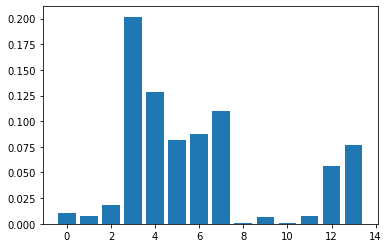

In [ ]:
# Obtencion de feature importance a traves de Random Forest
model = RandomForestClassifier()
#pipeline = Pipeline(steps=[("ct",columnasTransformer),("m",model)])
model.fit(Xtv,Ytv)

importance = permutation_importance(model, Xtv, Ytv, n_repeats=10)

for i,v in enumerate(importance['importances_mean']):
	print('Feature: %d-%s, \t\tScore: %.5f' % (i,X.columns[i],v))
 
plt.bar([x for x in range(len(importance['importances_mean']))], importance['importances_mean'])
plt.show()

###**Seleccion de las variables de mayor importancia**

Se puede observar como la importancia recae en mayor parte sobre tres de las variables:
* FLUORUROS_mg/L
* DUR_mg/L
* AS_TOT_mg/L

In [ ]:
# Reduccion de las variables de entrada a solo 3
X_new = X[["FLUORUROS_mg/L","DUR_mg/L","AS_TOT_mg/L"]]
X_new.head()

,FLUORUROS_mg/L,DUR_mg/L,AS_TOT_mg/L
0,0.9766,213.7320,0.0161
1,0.9298,185.0514,0.0134
2,1.8045,120.7190,0.0370
3,1.1229,199.8790,0.0154
4,0.2343,476.9872,0.0100


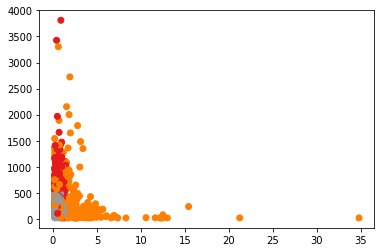

In [ ]:
# Visualizacion de los datos tomando en cuenta las dos variables mas importantes
plt.scatter(X_new["FLUORUROS_mg/L"], X_new["DUR_mg/L"], c=np.ravel(Y), cmap="Set1");

###**Clasificador**

Se utilizan Randon Forest y Decision Tree para decidir que modelo tiene mejor desempeño.

In [ ]:
mimodelo = RandomForestClassifier()

clf = mimodelo.fit(Xtv,Ytv)

clf.score(Xtest,Ytest)

0.957345971563981

In [ ]:
mimodelo2 = DecisionTreeClassifier()

clf2 = mimodelo.fit(Xtv,Ytv)

clf2.score(Xtest,Ytest)

0.966824644549763

Debido a que el score en ambos modelos es similar, se decide utilizar **Random Forest**.

In [ ]:
Y_hat = clf.predict(Xtest)

###**Grado de exactitud a traves del reporte de clasificacion**

In [ ]:
print(classification_report(Ytest,Y_hat))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        48
           1       0.99      0.96      0.97        79
           2       0.96      0.96      0.96        84

    accuracy                           0.97       211
   macro avg       0.96      0.97      0.97       211
weighted avg       0.97      0.97      0.97       211



###**Matriz de confusion**

In [ ]:
# Definiendo metodo para encontrar matriz de confusion

def mi_cm(yreal, ypred):

  cm = confusion_matrix(yreal, ypred)
  #frecuencia = ["{0:0.0f}".format(value) for value in cm.flatten()]
  #labels = [f"{v1}\n{v2}\n{v3}\n{v4}" for v1, v2, v3, v4 in zip(txt,short,frecuencia,porcentaje)]
  #labels = np.asarray(labels).reshape(2,2)
  ax = sns.heatmap(cm, fmt='', annot=True, cmap='winter_r', cbar=True, square=True,linewidths=0.5,linecolor="black")
  ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
  plt.show()

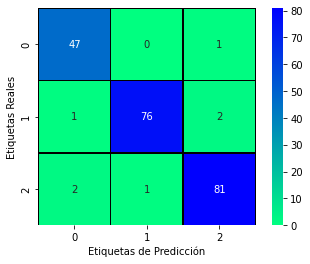

In [ ]:
mi_cm(Ytest,Y_hat)